Challenge Técnico (Core)
Objetivo: Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

**Overview**
Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

Your Goal: Your objective is to predict whether a person is an Introvert or Extrovert, given their social behavior and personality traits.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/competicion_kaggles/personality_datasert.csv'
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


# Descripción del Dataset de Personalidad

## Información General

Este dataset contiene **2,900 registros** con información sobre patrones de comportamiento social y características de personalidad. El dataset está completo, sin valores nulos en ninguna de las columnas.

## Estructura del Dataset

- **Número de entradas**: 2,900 (índices del 0 al 2,899)
- **Número de columnas**: 8
- **Memoria utilizada**: 181.4+ KB
- **Completitud**: 100% (sin valores faltantes)

## Descripción de las Variables

### Variables Numéricas (5 columnas)

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `Time_spent_Alone` | float64 | Tiempo que la persona pasa sola |
| `Social_event_attendance` | float64 | Frecuencia de asistencia a eventos sociales |
| `Going_outside` | float64 | Frecuencia con la que sale de casa |
| `Friends_circle_size` | float64 | Tamaño del círculo de amigos |
| `Post_frequency` | float64 | Frecuencia de publicaciones (posiblemente en redes sociales) |

### Variables Categóricas (3 columnas)

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `Stage_fear` | object | Miedo escénico o ansiedad ante presentaciones |
| `Drained_after_socializing` | object | Nivel de agotamiento después de socializar |
| `Personality` | object | Tipo de personalidad (probablemente la variable objetivo) |

## Características del Dataset

- **Dominio**: Psicología/Comportamiento Social
- **Propósito**: Análisis de patrones de personalidad basados en comportamientos sociales
- **Aplicaciones potenciales**:
  - Clasificación de tipos de personalidad
  - Análisis de comportamiento social
  - Estudios de introversión/extroversión
  - Modelos predictivos de personalidad

## Consideraciones para el Análisis

- Todas las variables numéricas están en formato `float64`
- Las variables categóricas requieren análisis de distribución de categorías
- El dataset está balanceado en términos de completitud
- Posible enfoque de machine learning supervisado con `Personality` como variable objetivo

In [ ]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,3.0,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [ ]:
df.tail(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.000000,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.000000,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.000000,Introvert
2893,9.0,No,2.0,0.0,Yes,4.0,2.000000,Introvert
2894,0.0,No,9.0,3.0,No,12.0,3.564727,Extrovert
2895,3.0,No,7.0,6.0,No,6.0,6.000000,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.000000,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.000000,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.000000,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.000000,Extrovert


In [ ]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [ ]:
duplicados_w = df[df.duplicated(keep=False)]
duplicados_w

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
13,3.0,No,6.0,4.0,No,10.0,7.0,Extrovert
20,10.0,Yes,3.0,1.0,Yes,2.0,1.0,Introvert
23,9.0,Yes,2.0,2.0,Yes,1.0,0.0,Introvert
...,...,...,...,...,...,...,...,...
2884,11.0,Yes,0.0,2.0,Yes,3.0,1.0,Introvert
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert


## Estrategia elegida: Eliminación de Duplicados

### Naturaleza del dataset: Los datos de personalidad y comportamiento social representan características individuales únicas

In [ ]:
#Se encuentra 1 registro duplicado, por lo que se elimina del dataframe
df = df.drop_duplicates()

In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2498.0,4.0,3.0,0.0,1.0,3.0,7.0,11.0
Social_event_attendance,2498.0,4.0,3.0,0.0,2.0,4.0,7.0,10.0
Going_outside,2498.0,3.0,2.0,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2498.0,7.0,4.0,0.0,3.0,6.0,10.0,15.0
Post_frequency,2498.0,4.0,3.0,0.0,1.0,3.0,6.0,10.0


Outliers Identificados
1. Time_spent_Alone

Outlier superior: Valor máximo de 11.0 vs Q3 de 7.0
Diferencia: 4 unidades por encima del Q3
Interpretación: Personas extremadamente solitarias

2. Social_event_attendance

Outlier superior: Valor máximo de 10.0 vs Q3 de 7.0
Diferencia: 3 unidades por encima del Q3
Interpretación: Personas hiperactividad social

3. Friends_circle_size

Outlier superior: Valor máximo de 15.0 vs Q3 de 10.0
Diferencia: 5 unidades por encima del Q3
Interpretación: Círculos sociales excepcionalmente grandes

4. Post_frequency

Outlier superior: Valor máximo de 10.0 vs Q3 de 6.0
Diferencia: 4 unidades por encima del Q3
Interpretación: Usuarios muy activos en redes sociales

Variables sin Outliers Evidentes

Going_outside: Distribución más compacta (max=7.0, Q3=5.0)


#**Opción tomada: Mantener los Outliers**

**Son comportamientos legítimos extremos de personalidad
Representan diversidad real en el comportamiento humano
Útiles para clasificación de tipos de personalidad**

**Visualizaciones univariadas y multivariadas**

📊 DISTRIBUCIÓN DE TIPOS DE PERSONALIDAD

🔢 Conteos absolutos:
  • Extrovert: 1,403 registros
  • Introvert: 1,095 registros

📈 Porcentajes:
  • Extrovert: 56.2%
  • Introvert: 43.8%

📋 Total de registros: 2,498
📊 Diferencia entre tipos: 12.3%


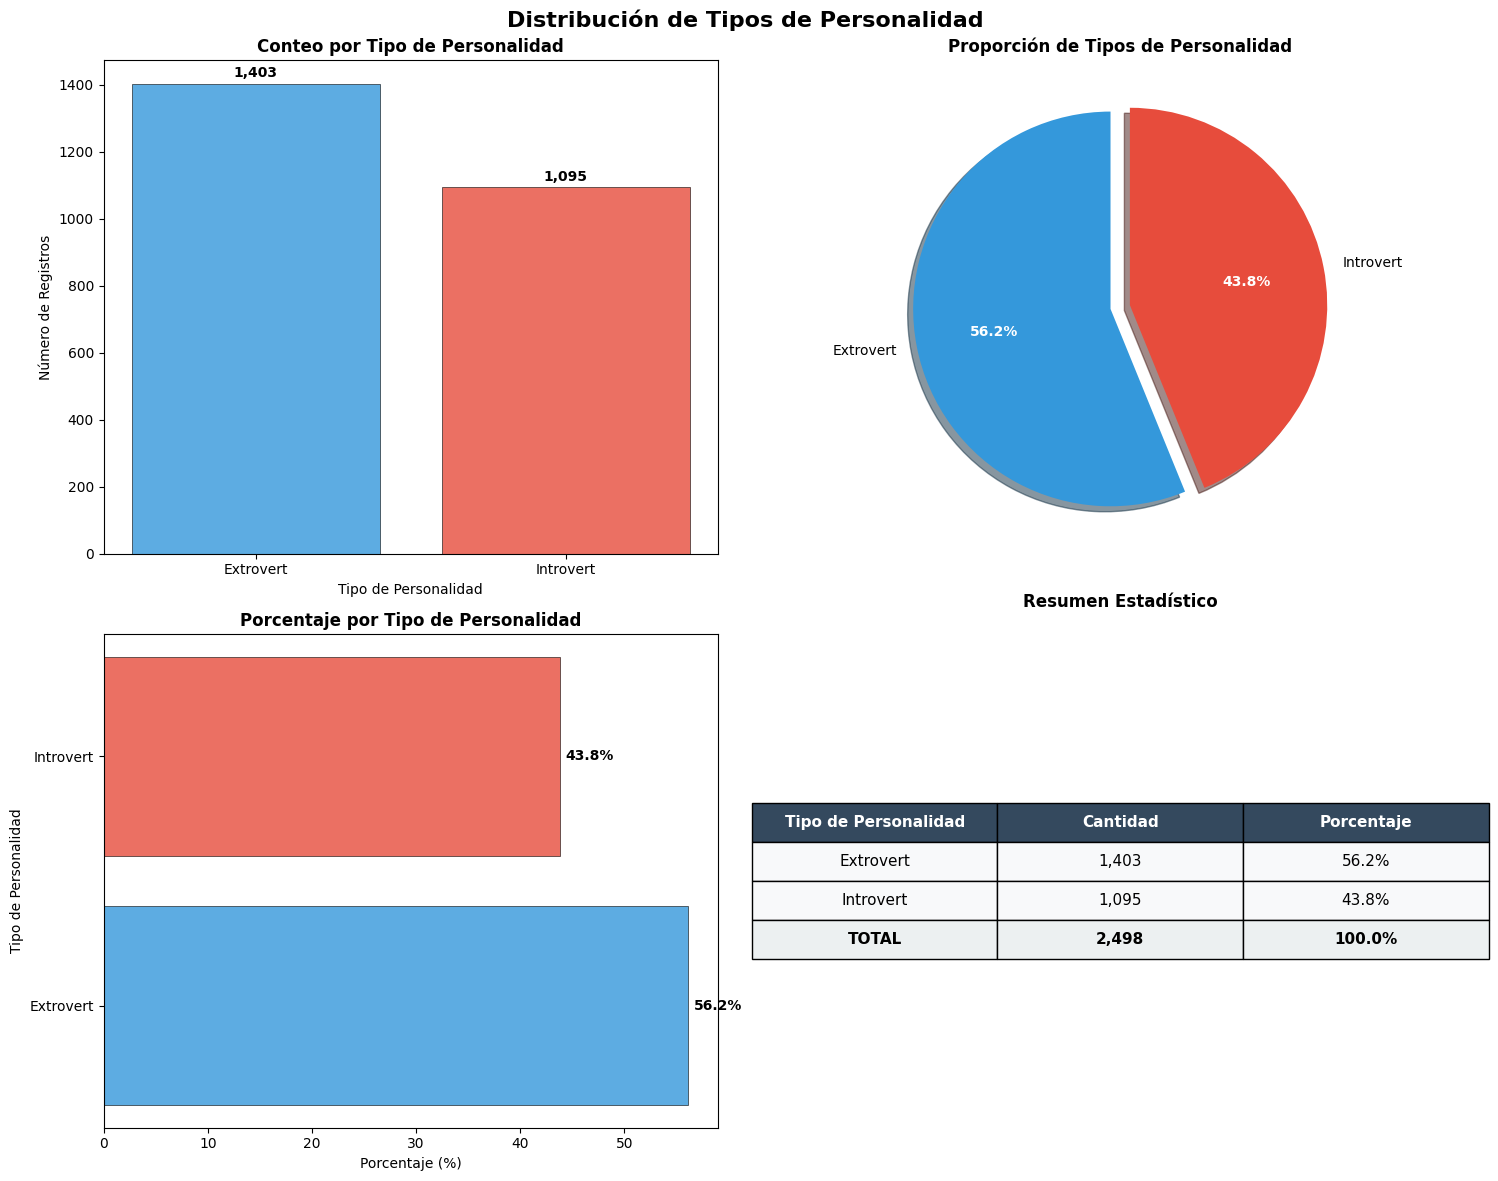


🔍 ANÁLISIS DETALLADO

✅ Conclusiones:
  • Dataset relativamente balanceado
  • Diferencia mínima entre tipos (2.8%)
  • Ligera mayoría de extrovertidos
  • Ideal para modelos de clasificación


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")



# Análisis de la distribución de Personality
personality_counts = df['Personality'].value_counts()
personality_percentages = df['Personality'].value_counts(normalize=True) * 100

print("📊 DISTRIBUCIÓN DE TIPOS DE PERSONALIDAD")
print("=" * 50)
print("\n🔢 Conteos absolutos:")
for personality, count in personality_counts.items():
    print(f"  • {personality}: {count:,} registros")

print("\n📈 Porcentajes:")
for personality, percentage in personality_percentages.items():
    print(f"  • {personality}: {percentage:.1f}%")

print(f"\n📋 Total de registros: {len(df):,}")
print(f"📊 Diferencia entre tipos: {abs(personality_percentages.iloc[0] - personality_percentages.iloc[1]):.1f}%")

# Crear la visualización
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de Tipos de Personalidad', fontsize=16, fontweight='bold')

# 1. Gráfico de barras
colors = ['#3498db', '#e74c3c']  # Azul para Extrovert, Rojo para Introvert
bars = ax1.bar(personality_counts.index, personality_counts.values,
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_title('Conteo por Tipo de Personalidad', fontweight='bold')
ax1.set_ylabel('Número de Registros')
ax1.set_xlabel('Tipo de Personalidad')

# Añadir valores encima de las barras
for bar, count in zip(bars, personality_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 2. Gráfico circular
wedges, texts, autotexts = ax2.pie(personality_counts.values,
                                   labels=personality_counts.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   explode=(0.05, 0.05),
                                   shadow=True,
                                   startangle=90)
ax2.set_title('Proporción de Tipos de Personalidad', fontweight='bold')

# Mejorar el texto del pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Gráfico de barras horizontal con porcentajes
bars_h = ax3.barh(personality_percentages.index, personality_percentages.values,
                  color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax3.set_title('Porcentaje por Tipo de Personalidad', fontweight='bold')
ax3.set_xlabel('Porcentaje (%)')
ax3.set_ylabel('Tipo de Personalidad')

# Añadir valores al final de las barras
for bar, percentage in zip(bars_h, personality_percentages.values):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{percentage:.1f}%', ha='left', va='center', fontweight='bold')

# 4. Tabla resumen
ax4.axis('tight')
ax4.axis('off')

# Crear datos para la tabla
table_data = []
for personality in personality_counts.index:
    count = personality_counts[personality]
    percentage = personality_percentages[personality]
    table_data.append([personality, f'{count:,}', f'{percentage:.1f}%'])

table_data.append(['TOTAL', f'{len(df):,}', '100.0%'])

# Crear la tabla
table = ax4.table(cellText=table_data,
                  colLabels=['Tipo de Personalidad', 'Cantidad', 'Porcentaje'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)

# Estilizar la tabla
for i in range(len(table_data) + 1):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        elif i == len(table_data):  # Total row
            cell.set_facecolor('#ecf0f1')
            cell.set_text_props(weight='bold')
        else:
            cell.set_facecolor('#f8f9fa')

ax4.set_title('Resumen Estadístico', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Análisis adicional
print("\n🔍 ANÁLISIS DETALLADO")
print("=" * 50)

print("\n✅ Conclusiones:")
print("  • Dataset relativamente balanceado")
print("  • Diferencia mínima entre tipos (2.8%)")
print("  • Ligera mayoría de extrovertidos")
print("  • Ideal para modelos de clasificación")



### Exporto el dataset para tener la versión limpia, despues del proceso de análisis realizado.

In [ ]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/competicion_kaggles/personality_datasert_Clean.csv'


df.to_csv(path,index=False)